In [9]:
from pathlib import Path
from collections import Counter
import spacy
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Chargement des chemins des fichiers
files = sorted([p for p in Path("corpus-entier/").rglob("*")])
if not files:
    raise RuntimeError(f"Aucun fichier trouvé dans {CORPUS_DIR.resolve()}.")

# Lecture des textes
texts = [p.read_text(encoding="utf-8", errors="ignore") for p in files]

# Traitement NLP
nlp = spacy.load("fr_core_news_sm")
docs = list(nlp.pipe(texts, batch_size=64, n_process=4))

In [11]:
# Calcul de statistiques
rows = []
for path, doc in zip(files, docs):
    rows.append(
        {
            "fichier":      path.name,
            "nombre de tokens":    len(doc),
            "types":     len(set([t.lemma_.lower() for t in doc if t.is_alpha])),
            "nombre de phrases": len(list(doc.sents)),
            # Ajoute ici d’autres métriques (longueur moyenne phrase, etc.)
        }
    )

df = pd.DataFrame(rows)

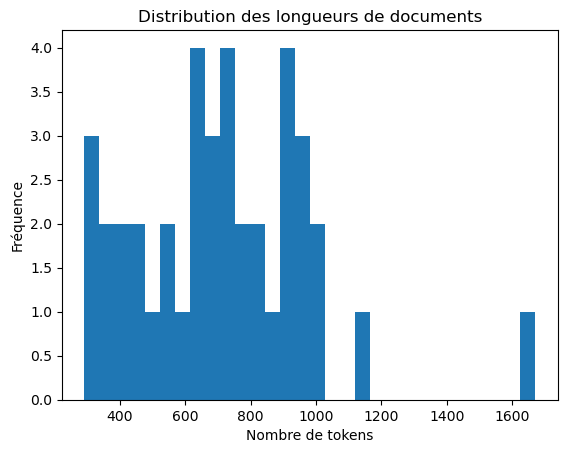

In [12]:
# Visualisations

# Histogramme des longueurs de documents
df["nombre de tokens"].plot(kind="hist", bins=30, title="Distribution des longueurs de documents")
plt.xlabel("Nombre de tokens")
plt.ylabel("Fréquence")
plt.show()

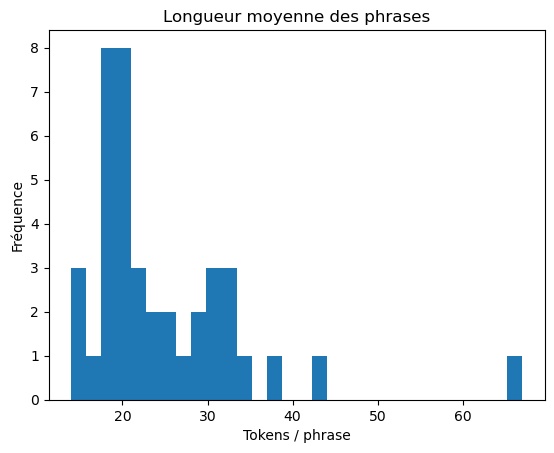

In [13]:
# Histogramme des longueurs de phrases
df["tokens_per_sentence"] = df["nombre de tokens"] / df["nombre de phrases"]
df["tokens_per_sentence"].plot(kind="hist", bins=30,
                               title="Longueur moyenne des phrases")
plt.xlabel("Tokens / phrase")
plt.ylabel("Fréquence")
plt.show()

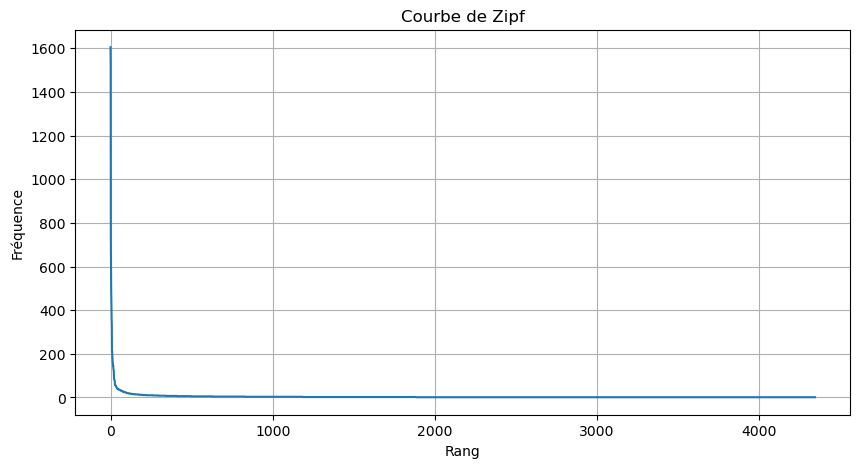

In [14]:
# Zipf sur l’ensemble du corpus
all_tokens = [
    tok.lemma_.lower()
    for doc in docs
    for tok in doc
    if tok.is_alpha
]

freqs = Counter(all_tokens)
sorted_freqs = sorted(freqs.values(), reverse=True)

plt.figure(figsize=(10, 5))
plt.plot(sorted_freqs)
plt.title("Courbe de Zipf")
plt.xlabel("Rang")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()